## Black-Friday

 ### Data
- Downloaded from https://www.kaggle.com/sdolezel/black-friday
- Moto: Black-Friday-Purchase
- Problem Statement - Regression Problem 


### Data Scraping
- Import Libraries


In [1]:
import pandas as pd
import numpy as np
from colorama import *
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

- Import Dataset 
  - Train Dataset
  - Test Dataset

In [2]:
data_train= pd.read_csv('train.csv')
data_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [3]:
data_test= pd.read_csv('test.csv')
data_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


- Veriable Indentification
   - Data Type
   - Missing values
   - Drop the columns
   - Shape

In [66]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


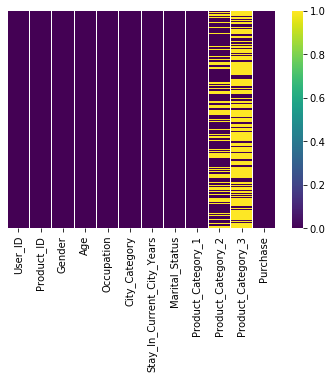

In [67]:
#Visualization of missing value
import seaborn as sns
sns.heatmap(data_train.isnull(), yticklabels=False, cmap='viridis')

In [68]:
#Drop the unnecessery variable
data_train.drop(['Product_Category_3'],axis=1,inplace=True)
data_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [69]:
data_train = data_train.drop(columns="User_ID")
data_train = data_train.drop(columns="Product_ID")
data_test = data_test.drop(columns="User_ID")
data_test = data_test.drop(columns="Product_ID")

In [71]:
cols = data_train.columns
print(cols)

Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Purchase'], dtype='object')


In [9]:
numarical_cols = data_train._get_numeric_data().columns#list of numarical variables
numarical_cols

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [10]:
cols = data_train.columns
num_cols = data_train._get_numeric_data().columns#list of numarical variables
categorical_cols=list(set(cols) - set(num_cols))
categorical_cols

['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']

In [11]:
for col in cols:
    b, c = np.unique(data_train[col], return_inverse=True)
    w = len(data_train[col].unique())
    print('- In {} unique values are {} and those are- {}'.format(col, w, b))

- In Gender unique values are 2 and those are- ['F' 'M']
- In Age unique values are 7 and those are- ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
- In Occupation unique values are 21 and those are- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
- In City_Category unique values are 3 and those are- ['A' 'B' 'C']
- In Stay_In_Current_City_Years unique values are 5 and those are- ['0' '1' '2' '3' '4+']
- In Marital_Status unique values are 2 and those are- [0 1]
- In Product_Category_1 unique values are 20 and those are- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
- In Product_Category_2 unique values are 18 and those are- [ 2.  3.  4. ... nan nan nan]
- In Purchase unique values are 18105 and those are- [   12    13    14 ... 23959 23960 23961]


In [12]:
total_missing = data_train.isnull().sum()
percent_miss = total_missing/data_train.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_missing, '% missing':percent_miss})
missing_data
missing_data.sort_values(by='Total missing', ascending=False)

,Total missing,% missing
Product_Category_2,173638,31.566643
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Purchase,0,0.000000


In [13]:
print(data_train.Product_Category_2.min())
print(data_train.Product_Category_2.max())

2.0
18.0


In [14]:
def fillNaN_with_random(data2):
    a = data2.values
    m = np.isnan(a) # mask of NaNs
    
    a[m] = np.random.randint(2, 18, size=m.sum())
    return data2

fillNaN_with_random(data_test['Product_Category_2'])
fillNaN_with_random(data_test['Product_Category_2'])

0         11.0
1          5.0
2         14.0
3          9.0
4          5.0
          ... 
233594    17.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 233599, dtype: float64

In [15]:
data_train=data_train.replace(to_replace ="4+", value ="4") 
data_test= data_test.replace(to_replace ="4+", value= "4")

In [17]:
print('Shape: ',data_train.shape)

Shape:  (550068, 7)


### Exploratery data Analysis

#### Univariant Analysis
    -Numarical Data
        - Dataset Numarical Attribute
            - Numarical Data
                - Central Tendency
            - Data Dispersion Measurement
                - Dataset Range
                - Skewness
                - Kurtosis
        - Visualization
            - Histogram Plotting
            - Box plotting
            - Density plot
                
    -Categorical Data
        - Visualization
            - Bar Plotting
            - Pie plotting

In [56]:
# Numarical Data
data_train.describe()

,Gender,Occupation,Marital_Status,Purchase
count,550068.0,550068.000000,550068.000000,550068.000000
mean,0.0,8.076707,0.409653,9263.968713
std,0.0,6.522660,0.491770,5023.065394
min,0.0,0.000000,0.000000,12.000000
25%,0.0,2.000000,0.000000,5823.000000
50%,0.0,7.000000,0.000000,8047.000000
75%,0.0,14.000000,1.000000,12054.000000
max,0.0,20.000000,1.000000,23961.000000


Variable_name: Occupation


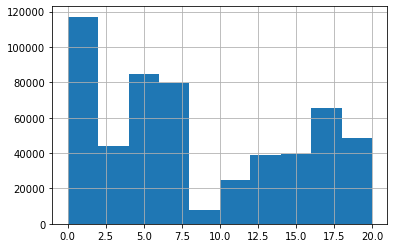

Variable_name: Marital_Status


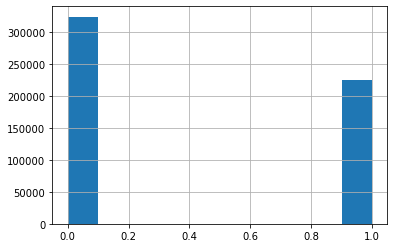

Variable_name: Product_Category_1


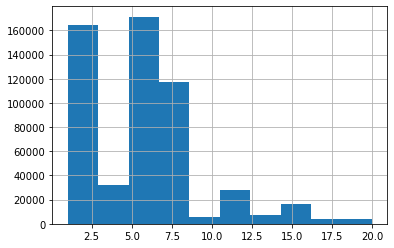

Variable_name: Product_Category_2


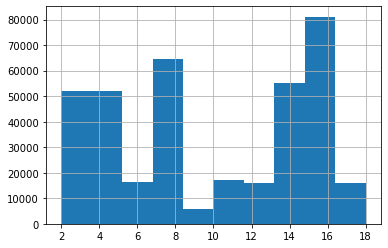

Variable_name: Purchase


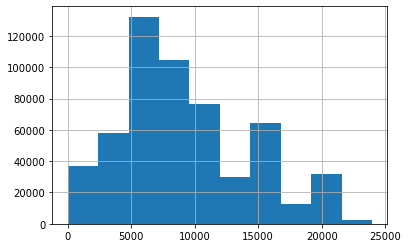

In [44]:
for i in numarical_cols:
    print('Variable_name:',i)
    #Histogram Plot
    data_train[i].hist()
    plt.show()

Variable_name: Occupation


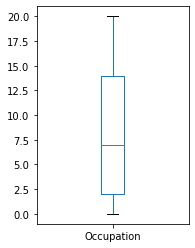

Variable_name: Marital_Status


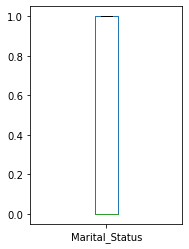

Variable_name: Product_Category_1


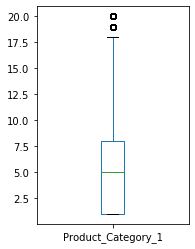

Variable_name: Product_Category_2


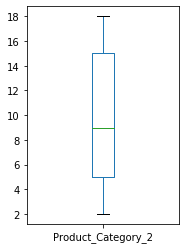

Variable_name: Purchase


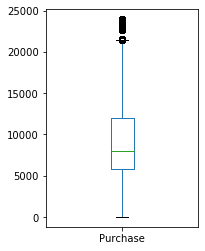

In [45]:
for i in numarical_cols:
    print('Variable_name:',i)
    #Box Plot
    data_train[i].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
    plt.show()

Variable_name: Occupation


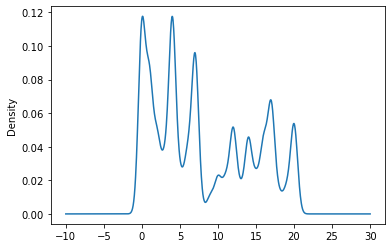

Variable_name: Marital_Status


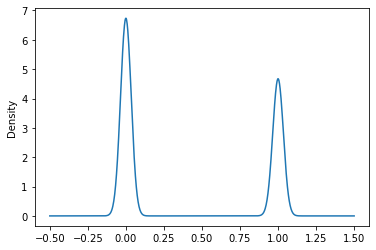

Variable_name: Product_Category_1


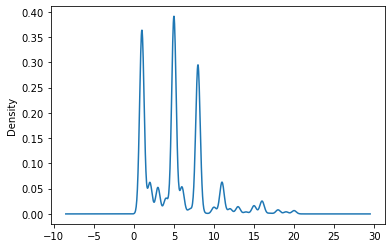

Variable_name: Product_Category_2


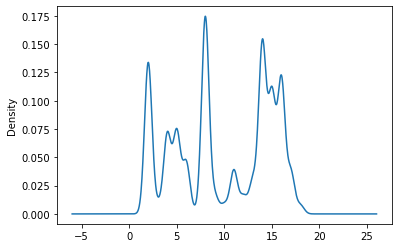

Variable_name: Purchase


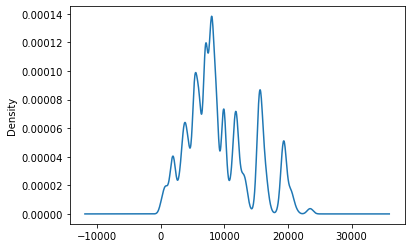

In [46]:
for i in numarical_cols:
    print('Variable_name:',i)
    #Density Plot
    data_train[i].plot.kde()
    plt.show()

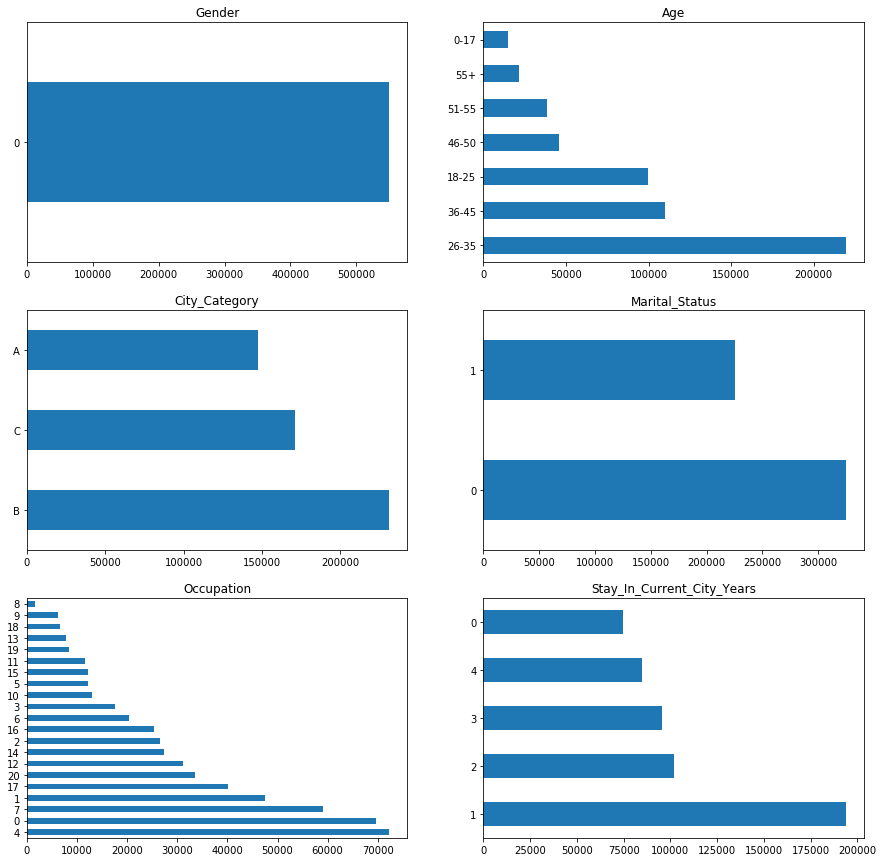

In [47]:
#Categorical Dataset
#Bar_plot:-Categorical values
'''
for i in categorical_cols:
    print('Variable_name:',i)
    data_train[i].value_counts().head(10).plot.bar()
    plt.show()
    '''
#or
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

data_train['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
data_train['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
data_train['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
data_train['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
data_train['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
data_train['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

Analysis Result
- Age : should be treated as numerical. It presents age groups.
- City_Category: We can convert this to numerical as well, with dummy variables. Should take a look at the frequency of the values.
- Occupation : It seems like it has at least 16 different values. If possible we will try to reduce these values
- Gender: There are possibly two gender,we can make this binary .
- Product_ID: Should see if the string “P” means something and if there are other values.
- Stay_In_Current_City_Years: We should deal with the ‘+’ symbol. So It is replaced by 4
- Product_Category_2 and Product_Category_3 : Have NaN values. As Product_Category_3  having 70% missing values so eliminate that varible. and Null values in Product_Category_2 will be replaced by random number range form 2 to 18 
- change the variable type form integer value :- Occupation

#### Bivariant Analysis

Dataset Correlation 
    - Check the Result 
    - Remove Variables
    - Scatter Plot

In [39]:
data_train.corr()['Purchase'] 

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

In [75]:
#data.corr()['Purchase'].abs() > .8

In [40]:
# Drop the columns Product_Category_1 and Product_Category_2 in the train and test set
data_train = data_train.drop(columns="Product_Category_1")
data_train = data_train.drop(columns="Product_Category_2")
data_test = data_test.drop(columns="Product_Category_1")
data_test = data_test.drop(columns="Product_Category_2")

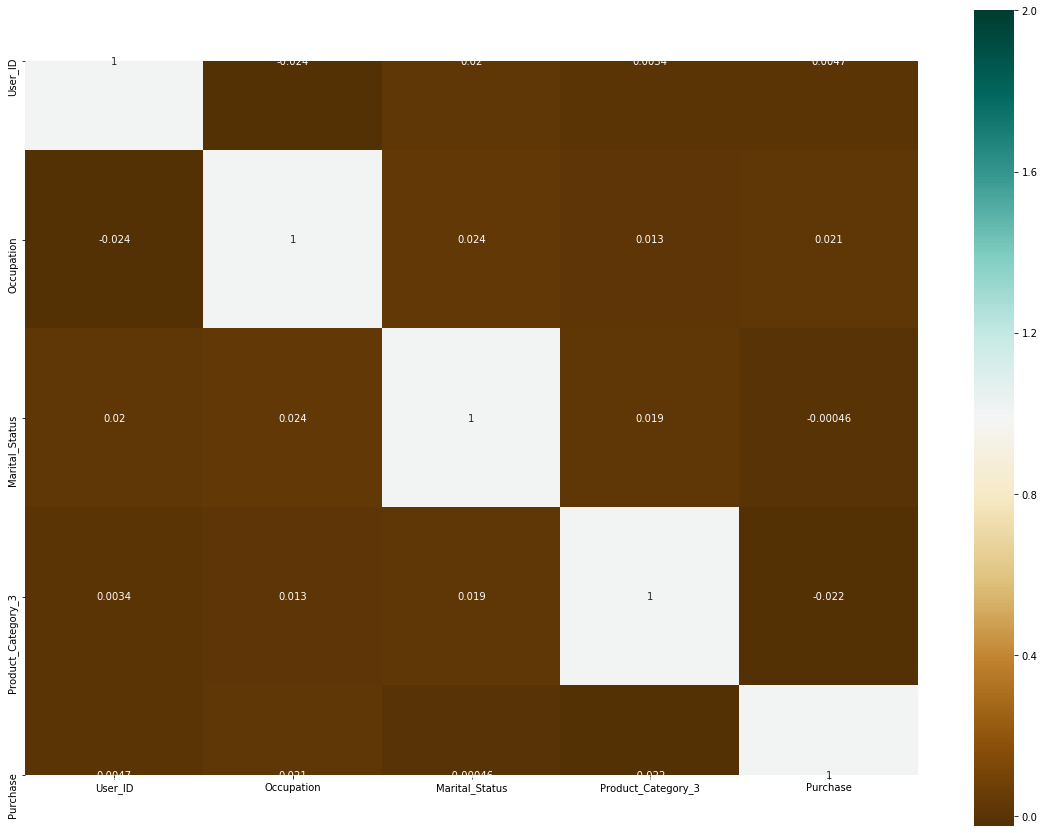

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

hmap = data_train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(hmap, vmax=2,annot=True,cmap="BrBG", square=True);

In [18]:
# Train set
# Nous remplacons tout d'abord les valeurs de la colonne 'Gender' initialement égales à 'F' par 0 et 'M' par 1
# Cette opération n'est pas nécessaire pour la colonne 'Marital_Status' puisque ces valeurs sont déjà sous cette forme
data_train.Gender = np.where(str(data_train.Gender)=='M',1,0) # Femelle: 0, Male: 1
data_test.Gender = np.where(str(data_test.Gender)=='M',1,0) # Femelle: 0, Male: 1

# Nous encodons ensuites les variables catégoriques (Age, City_Category, Occupation)
data_train_Age = pd.get_dummies(data_train.Age)
data_train_CC = pd.get_dummies(data_train.City_Category)
data_train_Occup = pd.get_dummies(data_train.Occupation)
data_test_Age = pd.get_dummies(data_test.Age)
data_test_CC = pd.get_dummies(data_test.City_Category)
data_test_Occup = pd.get_dummies(data_test.Occupation)

# Et nous remplacons les variables catégoriques initiales par les variables encodées
data_train_encoded = pd.concat([data_train_Age,data_train_CC,data_train_Occup,data_train],axis=1)
data_train_encoded.drop(['Age','City_Category','Occupation'],axis=1,inplace=True)
data_test_encoded = pd.concat([data_test_Age,data_test_CC,data_test_Occup,data_test],axis=1)
data_test_encoded.drop(['Age','City_Category','Occupation'],axis=1,inplace=True)
print(data_train_encoded)
print(data_test_encoded)

        0-17  18-25  26-35  36-45  46-50  51-55  55+  A  B  C  ...  15  16  \
0          1      0      0      0      0      0    0  1  0  0  ...   0   0   
1          1      0      0      0      0      0    0  1  0  0  ...   0   0   
2          1      0      0      0      0      0    0  1  0  0  ...   0   0   
3          1      0      0      0      0      0    0  1  0  0  ...   0   0   
4          0      0      0      0      0      0    1  0  0  1  ...   0   1   
...      ...    ...    ...    ...    ...    ...  ... .. .. ..  ...  ..  ..   
550063     0      0      0      0      0      1    0  0  1  0  ...   0   0   
550064     0      0      1      0      0      0    0  0  0  1  ...   0   0   
550065     0      0      1      0      0      0    0  0  1  0  ...   1   0   
550066     0      0      0      0      0      0    1  0  0  1  ...   0   0   
550067     0      0      0      0      1      0    0  0  1  0  ...   0   0   

        17  18  19  20  Gender  Stay_In_Current_City_Years  Mar

In [24]:
X_train = data_train_encoded.iloc[:, :-1].values # Prend toutes les colonnes sauf la dernière (variable cible)
print(X_train.shape)
y_train = data_train_encoded.iloc[:,-1].values # Prend la dernière colonne (variable cible)
print(y_train.shape)
# Pour présire les nouveaux résultats
#X_test = data_test_encoded # Prend toutes les colonnes sauf la dernière (variable cible)

(550068, 34)
(550068,)


In [25]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) # nous utilisons une foret de 10 arbres décisionnels, random_state supprime la variabilité des résultats
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
# Predict new results on the test set
prediction = np.round(regressor.predict(X_test))
print(prediction)
# Reshape prediction vector into a 2D matrix
prediction = prediction.reshape(len(prediction), 1)

# concatenate X_test with prediction 
dataTest = np.concatenate((X_test, prediction), axis = 1)
print(dataTest)

[12148.  9861.  9604. ...  8058.  9404.  8156.]
[[0 0 0 ... '2' 1 12148.0]
 [0 0 1 ... '0' 0 9861.0]
 [0 0 0 ... '4' 1 9604.0]
 ...
 [0 0 1 ... '4' 1 8058.0]
 [0 0 0 ... '4' 0 9404.0]
 [0 0 0 ... '4' 1 8156.0]]


Text(0.5, 0, 'relative importance')

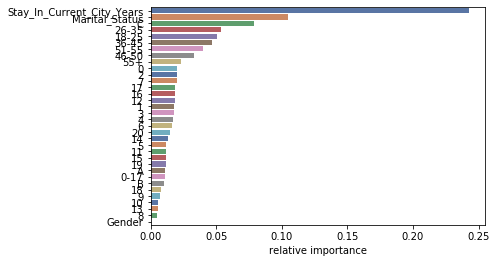

In [28]:
# Feature importance 
f_im = regressor.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=data_test_encoded.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

In [43]:
# Options pour afficher davantage de colonnes en sortie
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Option pour avoir des résultats consistants
np.random.seed(0)

# Pour faciliter la manipulation des données, repartons de l'ensemble de test duquel nous avons supprimé les colonnes
# inutiles à notre analyse. Ajoutons simplement une colonne prediction à cet ensemble.
data_test['prediction'] = prediction
# Nous prenons 10 lignes de l'ensemble de test et les ordonnons selon la valeur de la colonne prédiction 
# (par ordre décroissant)
print(data_test.sample(10).sort_values(by='prediction',ascending=False))

        User_ID Product_ID Gender    Age  Occupation City_Category Stay_In_Current_City_Years  Marital_Status  Product_Category_3  prediction
20988   1002459  P00213242      M  51-55           7             A                          1               1                 NaN     11763.0
106666  1002229  P00057242      M  46-50           0             C                          0               0                 NaN     11456.0
53403   1004284  P00272242      M  51-55           7             B                          1               0                 NaN     10524.0
69345   1004702  P00058042      M  26-35          11             C                          0               0                 NaN     10268.0
165349  1002731  P00112142      M  36-45           7             C                          1               0                14.0     10166.0
90408   1001274  P00274142      M  46-50           7             B                         4+               1                 NaN      9578.0
145096